## Project Description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. (The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.) The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature




### Table of contents

<a href="#Step-1.-Open-the-data-file-and-study-the-general-information">Step 1. Open the data file and study the general information<a/>  
    
<a href="#Step-2.-Prepare-the-data">Step 2. Prepare the data</a>
* <a href="#Replace-the-column-names-(make-them-lowercase)">Replace the column names (make them lowercase)</a>
* <a href="#Identify-and-study-missing-values">Identify and study missing values</a>
* <a href="#Check-for-duplicates">Check for duplicates</a>
* <a href="#Convert-the-data-to-the-required-types">Convert the data to the required types</a>
* <a href="#Calculate-the-total-sales">Calculate the total sales</a>
    
<a href="#Step-3.-Analyze-the-data">Step 3. Analyze the data<a/>
* <a href="#Number-of-games-released-in-different-years">Number of games released in different years<a/>
* <a href="#How-sales-varied-from-platform-to-platform">How sales varied from platform to platform<a/>
* <a href="#Determine-what-period-you-should-take-data-for">Determine what period you should take data for<a/>
* <a href="#Which-platforms-are-leading-in-sales?">Which platforms are leading in sales?<a/>
* <a href="#Box-plot-for-the-global-sales-of-all-games,-broken-down-by-platform">Box plot for the global sales of all games, broken down by platform<a/>
* <a href="#How-user-and-professional-reviews-affect-sales-for-one-popular-platform">How user and professional reviews affect sales for one popular platform<a/>
* <a href="#Compare-the-sales-of-the-same-games-on-other-platforms">Compare the sales of the same games on other platforms<a/>
* <a href="#General-distribution-of-games-by-genre">General distribution of games by genre<a/>
     
<a href="#Step-4.-Create-a-user-profile-for-each-region">Step 4. Create a user profile for each region<a/>
* <a href="#Top-5-platforms-in-each-region">Top 5 platforms in each region<a/>
* <a href="#Top-5-genre-in-each-region">Top 5 genre in each region<a/>
* <a href="#Do-ESRB-ratings-affect-sales-in-individual-regions?">Do ESRB ratings affect sales in individual regions?<a/>
    
<a href="#Step-5.-Test-the-following-hypotheses">Step 5. Test the following hypotheses<a/>
* <a href="#Average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same">Average user ratings of the Xbox One and PC platforms are the same</a>
* <a href="#Average-user-ratings-for-the-Action-and-Sports-genres-are-different">Average user ratings for the Action and Sports genres are different</a>
    
<a href="#Step-6.-Write-a-general-conclusion">Step 6. Write a general conclusion<a/>

### Step 1. Open the data file and study the general information

In [2]:
# load libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

# load the csv data files to python and display the size and five ten rows
games = pd.read_csv('/datasets/games.csv')
display(games.info())
display(games.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Conclusion**

The dataset consists of 16715 rows and 11 columns in total, 3 columns with categorical variables [`Name`, `Platform`, `Genre`, `Rating`] and 5 columns with quantitative variables [`Year_of_Release`, `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`, `User_Score`].

There are six columns with missing values [`Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` and `Rating`].

[<a href="#Table-of-contents">Back to top</a>]

### Step 2. Prepare the data

#### Replace the column names (make them lowercase)

In [3]:
# make the columns names to lower case
games.columns = [x.lower() for x in games.columns]
display(games.head())

# rename column names
games = games.rename({'name':'game_name',
                      'na_sales':'north_american_sales', 
                      'eu_sales':'europe_sales', 
                      'jp_sales':'japan_sales', 
                      'other_sales':'other_countries_sales', 
                      'rating':'esrb_rating'}, axis=1)
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Conclusion**

We decided to make the column names lowercase so as to avoid typographic error when carrying out our analysis as Python is case sensitive. We also rename some selected columns so that our dataframe will be understandable by just taking a look at it.

[<a href="#Table-of-contents">Back to top</a>]

#### Identify and study missing values

In [4]:
display("The percentage of missing values per column:")
display(games.isnull().sum() / len(games))

'The percentage of missing values per column:'

game_name                0.000120
platform                 0.000000
year_of_release          0.016093
genre                    0.000120
north_american_sales     0.000000
europe_sales             0.000000
japan_sales              0.000000
other_countries_sales    0.000000
critic_score             0.513192
user_score               0.400897
esrb_rating              0.404786
dtype: float64

**Conclusion**

We investigated the dataframe to know the percentage of the missing values in each column. A significant 51% values are missing in column `critic_score`, 40% each in column `user_score` and column `esrb_rating`, 1.6% in `year_of_release`, and less than 1% each in column `game_name` and column `genre`.  


[<a href="#Table-of-contents">Back to top</a>]

**game_name & genre**

In [5]:
# display number of missing values in the column
display(games['game_name'].isnull().sum())

# display rows with missing values
display(games[games['game_name'].isnull()])

# display the number of unique values of 'game_name' where 'year_of_release' is 1993
display(games[(games['year_of_release'] == 1993.0) & (games['platform'] == 'GEN')])

# drop the missing value in column 'game_name'
games.dropna(subset=['game_name'], inplace = True)

# display number of missing values in the column
display(games['game_name'].isnull().sum())

# display number of missing values in the column
display(games['genre'].isnull().sum())

2

,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


0

0

**Conclusion**

The missing values in `game_name` could be as result of error of omission when inputting the data. Since the missing values in the column is less than 1%, we begin by checking the number of the missing values. We discovered that just two values are without a game name. So we decided to investigate the rows containing the missing values. To our surprise, the two rows are also missing values on 4 other columns (`genre`, `critic_score`, `user_score`, and `esrb_rating`) but have the same year of release (1993). We further investigate and discovered that there are 7 other games with the same year of release and platform. With this, it is almost impossible to fill in these missing values, so we decided to drop them from our dataframe.

Since both `game_name` and `genre`columns have the same percentage of missing values, we decided to investigate if there is possibility that the missing values in both columns are on the same rows. Unsurprisingly, the missing values for both columns are on the same rows.

The missing values in `genre` could be as result of not having access to the information during collection of data.


[<a href="#Table-of-contents">Back to top</a>]

**year_of_release** 

In [6]:
# display number of missing values in the column
display(games['year_of_release'].isnull().sum())

# fill in missing values with median values
games['year_of_release'] = games['year_of_release'].fillna(
    games.groupby('game_name')['year_of_release'].transform('mean'))

# display number of missing values in the column
display(games['year_of_release'].isnull().sum())

# fill in missing values with median values
games['year_of_release'] = games.groupby('platform')['year_of_release'].apply(
    lambda x: x.fillna(x.mode().iloc[0]))

# display number of missing values in the column
display(games['year_of_release'].isnull().sum())

269

146

0

**Conclusion**

There are 269 games missing the year of release in our dataset. This missing values could be as a result of the data engineer assuming that games of the name have the same release year and do not need to be input repeatedly to the data. So we decided to fill the missing values with the average year of release of games with the same name. After doing this, we still have 146 missing values left in the column. Then we decided to fill this with the common year of release grouped by the games' platform.

[<a href="#Table-of-contents">Back to top</a>]

**critic_score**

In [7]:
# display number of missing values in the column
display(games['critic_score'].isnull().sum())

# fill in missing values with 'unknown'
games['critic_score'] = games['critic_score'].fillna(value='unknown')

# display number of missing values in the column
display(games['critic_score'].isnull().sum())

8576

0

**Conclusion**

There are 8576 games without critic score. This missing values could be as a result of not having access to the information during data collection. We decided to fill this missing values with 'unknown' as it will be almost impossible to determine the critic score of a game based on other variables we have. 

[<a href="#Table-of-contents">Back to top</a>]

**user_score**

In [8]:
# display number of missing values in the column
display(games['user_score'].isnull().sum())

# display the unique values in the column
display(games['user_score'].unique())

# fill in missing values with 'unknown'
games['user_score'] = games['user_score'].fillna(value='unknown')

# display the number of 'tbd' in the column 
display(len(games[games['user_score'] == 'tbd']))

# display number of missing values in the column
display(games['user_score'].isnull().sum())

6699

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

2424

0

**Conclusion**

There are 6699 missing values in this column. It might be either there was no access to the information during data collection or there was no reliable source to gather the information. We noticed there is another unique value `tbd`, which means 'to be determined' in the column. These `tbd` values in the column might be that there is possibility of getting the information. 

We decided to fill the missing values with `unknown` since it is almost impossible to determine the user score. We assumed that it is the intension of the data engineer to fill in the `tbd` values whenever the information is accessible, so we decided to leave the `tbd` values as it is. 


[<a href="#Table-of-contents">Back to top</a>]

**esrb_rating**

In [9]:
# display number of missing values in the column
display(games['esrb_rating'].isnull().sum())

# fill in missing values with 'undefined'
games['esrb_rating'] = games['esrb_rating'].fillna(value='undefined')

# display number of missing values in the column
display(games['esrb_rating'].isnull().sum())

6764

0

**Conclusion**

We are missing 6764 values in this column. These missing values could be as a result of not having access to the information or maybe the set of games with this missing values are without ESRB rating.   


[<a href="#Table-of-contents">Back to top</a>]

#### Check for duplicates

In [10]:
# check for duplicates in the dataframes
display(games.duplicated().sum())

0

**Conclusion**
We discovered that there is no duplicate in any of our dataframes.

[<a href="#Table-of-contents">Back to top</a>]

#### Convert the data to the required types

In [11]:
display(games.info())

# >>> YEAR_OF_RELEASE <<<

# convert the data types of values in the column to datetime data type
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')

# extract the year from the date format and display data type
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year
display(games['year_of_release'].dtype)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
game_name                16713 non-null object
platform                 16713 non-null object
year_of_release          16713 non-null float64
genre                    16713 non-null object
north_american_sales     16713 non-null float64
europe_sales             16713 non-null float64
japan_sales              16713 non-null float64
other_countries_sales    16713 non-null float64
critic_score             16713 non-null object
user_score               16713 non-null object
esrb_rating              16713 non-null object
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


None

dtype('int64')

**Conclusion**

We decided to change the data type of column `year_of_release` from floating point to datetime format. 

[<a href="#Table-of-contents">Back to top</a>]

#### Calculate the total sales

In [12]:
# add all columns of sales to get the total sales
games['total_sales'] = games['north_american_sales'] + games['europe_sales'] + games['japan_sales'] + games['other_countries_sales']

# display the first five rows
display(games.head())

,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unknown,unknown,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,unknown,unknown,undefined,31.38


**Conclusion**

We decided to get the total sales of each game in all regions by adding column `north_american_sales`, `europe_sales`, `japan_sales`, and `other_countries_sales` together, saved the result in a new column `total_sales`.

[<a href="#Table-of-contents">Back to top</a>]

### Step 3. Analyze the data

#### Number of games released in different years

,game_name
year_of_release,
1980,9
1981,62
1982,36
1983,17
1984,14


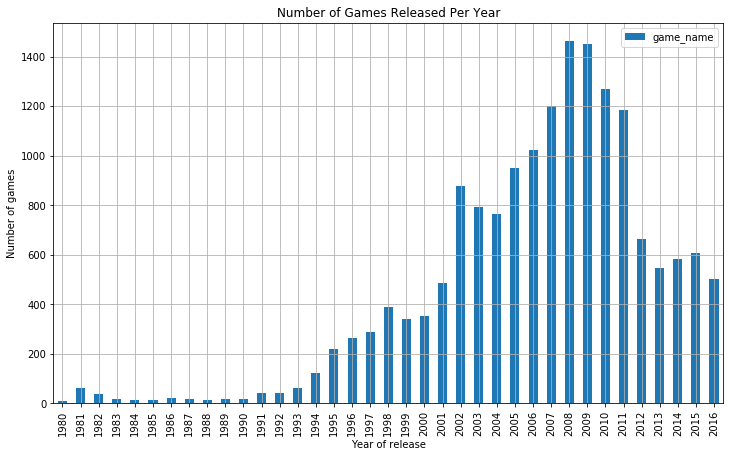

In [13]:
# create a pivot table for the number of games per year
games_per_year = games.pivot_table(index='year_of_release', values='game_name', aggfunc='count')

# display the pivot table
display(games_per_year.head())

# create bar chart diplaying the number of games in different years
games_per_year.plot.bar(title='Number of Games Released Per Year',figsize=(12,7), grid=True)
plt.ylabel('Number of games')
plt.xlabel('Year of release')
plt.show()

**Conclusion**

We created a pivot table to calculate the number of games that was released in different years by using the `.pivot_table` method, passing column `year_of_release` as the index, column `game_name` as values, and `sum` as the aggfunc. For readability and understanding, we decided to plot a bar chart to visualize our result.

From the bar chart, more games were released during the third century of our dataset (2000 to 2009), and very few were released during the first century (1980 to 1989). There was a rapid fall of the number of games released from 2010 to 2013.  
Year 2008 and 2009 have the highest number of games released, with over 1400 games released in each year. We can say that 1991 is the year of rise of the games as it is the start of inclination in the number of games released. Previous years have a relatively low number of games released apart from 1981 and 1982.

[<a href="#Table-of-contents">Back to top</a>]

#### How sales varied from platform to platform

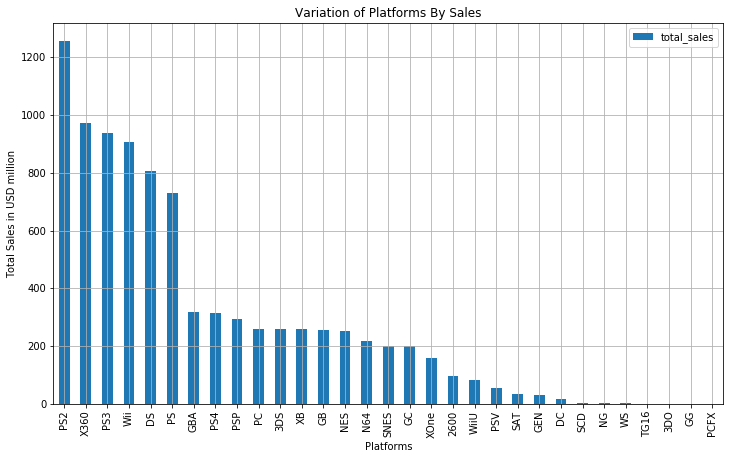

In [14]:
# create a pivot table for the number of games per year
sales_platform = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)


# create bar chart diplaying the number of games in different years
sales_platform.plot.bar(title='Variation of Platforms By Sales',figsize=(12,7), grid=True)
plt.ylabel('Total Sales in USD million')
plt.xlabel('Platforms')
plt.show()

**Conclusion** 

To check how sales varied from platform to platform, we decided to create a pivot table `sales_platform`, by grouping the global sales by platforms using the `.pivot_table` method. We then plotted a bar chart of this pivot table with the title `Variation of Platforms By Sales` to visualize our result.

There are four platforms that made less than a million dollar sales globally. Theses platforms are TG16, 3DO, GG, and PCFX. Only six platforms made over 600 millions dollar sales globally (PS2, X360, PS3, Wii, D5, PS), and the rest making less than 400 millions dollar sales. The platform with the highest sales globally is PS2, making over 1200 millions dollar sales.


[<a href="#Table-of-contents">Back to top</a>] 

'The top 9 platform with highest total sales are:'

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     GBA
7     PS4
8     PSP
Name: platform, dtype: object

,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


platform,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,
1985,0.02,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1994,0.00,0.0,6.03,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.00,0.0,35.96,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.00,0.0,94.70,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.00,0.0,136.17,0.0,0.0,0.0,0.0,0.0,0.0


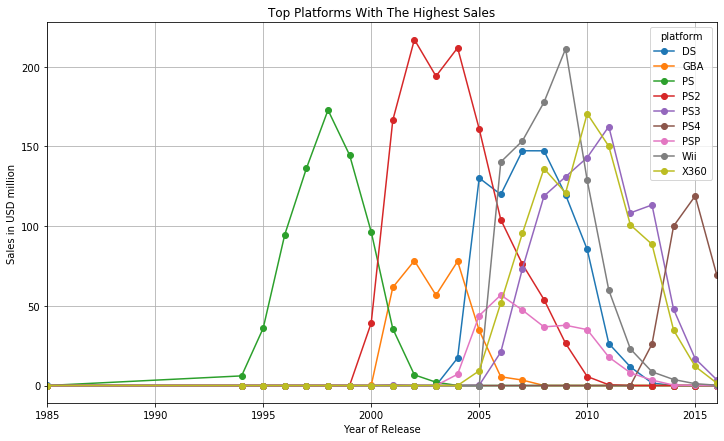

In [15]:
# change index to column
sales_platform.reset_index(level='platform', inplace=True)

# extract the top 6 platforms
top_platform_sales = sales_platform['platform'].head(9)
display('The top 9 platform with highest total sales are:', top_platform_sales)

# create dataframe for the top 6 platforms
top_platforms = games[games['platform'].isin(top_platform_sales)]

# display the first five rows of the dataframe
display(top_platforms.head())

# create a pivot table for dataframe
top_platforms_pivot = top_platforms.pivot_table(
    index='year_of_release', values='total_sales', columns='platform', aggfunc=np.sum, fill_value=0)

# display the first five rows of the pivot table
display(top_platforms_pivot.head())

# draw line plot for the pivot table
top_platforms_pivot.plot(title='Top Platforms With The Highest Sales', figsize=(12,7), grid=True, marker='o')
plt.ylabel('Sales in USD million')
plt.xlabel('Year of Release')
plt.show()

**Conclusion**

From the `Variation of Platforms By Sales` bar chart, we chose 9 platforms as the platforms with the greatest total sales. These platforms are PS2, X360, PS3, Wii, DS, PS, GBA, PS4, and PSP. We decided to cerate a dataset for these platforms, grouped the dataset using `.pivot_table()` method, by the games' year of realease with the total sales as the values.  
Platforms like PS, PS2, DS, GBA and Wii used to be popular games with high amount of sales globally but they are not popular again as their sales depreciated down to zero sales.  
Generally, it took the old platforms like PS and PS2 10 years to fade away and it took 7 years for new platforms to appear.  


[<a href="#Table-of-contents">Back to top</a>] 

#### Determine what period you should take data for

In [16]:
# filter data with year of release from 2013 
games_new = games[games['year_of_release'] >= 2013]
display(games_new.head())

,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,unknown,unknown,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,unknown,unknown,undefined,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


From our line plot, we decided to pick 2013 as the year to take data from so that we will be able to build a prognosis for the year 2017. We consider 3 years sufficient to study and make prediction for sales, so we used the year 2013 to create a dataset which we will continue to work on.

#### Which platforms are leading in sales?

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,33.25
Wii,13.66


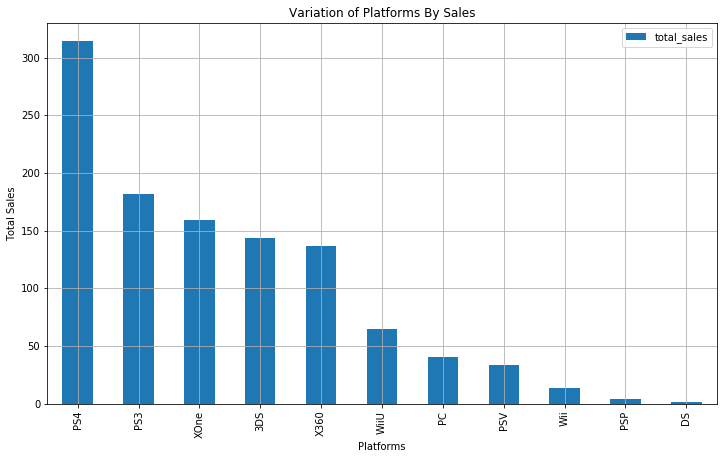

In [17]:
# create a pivot table for the number of games per year
new_sales_platform = games_new.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

display(new_sales_platform)
# create bar chart diplaying the number of games in different years
new_sales_platform.plot.bar(title='Variation of Platforms By Sales',figsize=(12,7), grid=True)
plt.ylabel('Total Sales')
plt.xlabel('Platforms')
plt.show()

**Conclusion**

To determine the platforms that are leading in sales, we decided to create a pivot table from our new dataset and used this pivot table to plot a bar chart with the platforms as the horizontal axis and the total sales as the vertical axis.

From the bar chart, we were able to pick the top five platforms that are leading in sales. These platforms are PS4, PS3, XOne, 3DS and X360. The platforms are listed in accordance of their position in sales leader board, with PS4 having a total sales of over 300 million dollars.


[<a href="#Table-of-contents">Back to top</a>]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.51,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


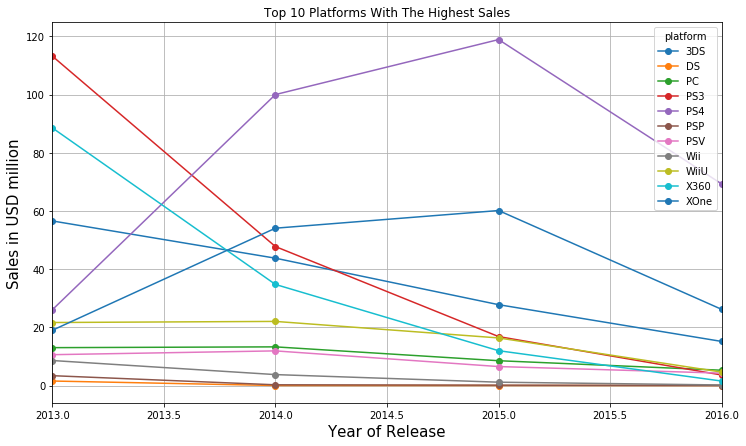

In [18]:
new_platform_year_sales = games_new.pivot_table(
    index='year_of_release', values='total_sales', columns='platform', aggfunc=np.sum, fill_value=0)
display(new_platform_year_sales.head())

new_platform_year_sales.plot(title='Top 10 Platforms With The Highest Sales', figsize=(12,7), grid=True, marker='o')
plt.ylabel('Sales in USD million', size=15)
plt.xlabel('Year of Release', size=15)
plt.show()

**Conclusion** 

We decided to build a line plot showing trend of the top 10 platforms with the highest sales. It can be deduced from our line plot that PS4 and XOne are the only platforms that growing in sales by years, while PS3, X360, and 3DS platforms are shrinking.  
PC, DS, PSV and Wii are considered potential profitable platforms as there are slight changes in sales for these platforms from 2013 to 2015.

[<a href="#Table-of-contents">Back to top</a>]

#### Box plot for the global sales of all games, broken down by platform

,platform,game_name,total_sales
0,PS3,Grand Theft Auto V,21.05
1,X360,Grand Theft Auto V,16.27
2,PS4,Call of Duty: Black Ops 3,14.63
3,3DS,Pokemon X/Pokemon Y,14.60
4,PS4,Grand Theft Auto V,12.62
5,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
6,X360,Call of Duty: Ghosts,10.24
7,PS3,Call of Duty: Ghosts,9.36
8,X360,Minecraft,9.18
9,PS4,FIFA 16,8.58


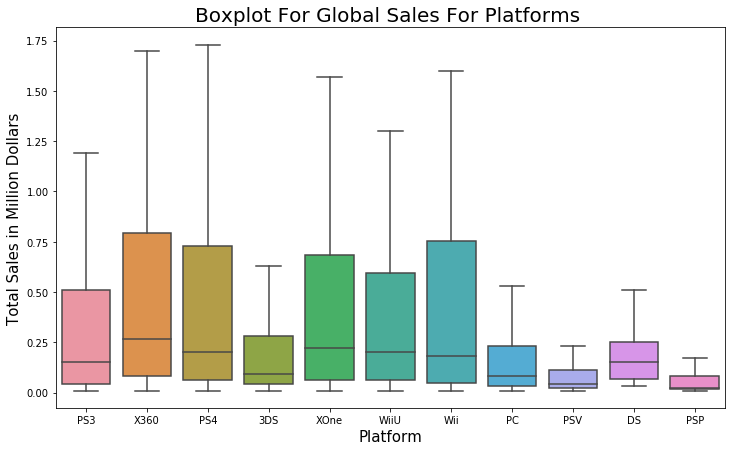

In [19]:
# group the dataset by platform and name 
boxplot_data = games_new.groupby(
    ['platform','game_name'])['total_sales'].sum().sort_values(ascending = False).reset_index()

# display the first ten rows  
display(boxplot_data.head(10))

# group the grouped data by platform
boxplot_ordered = boxplot_data.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
boxplot_ordered

# build a boxplot
y_values = boxplot_data["total_sales"].values
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'platform', y = 'total_sales', data = boxplot_data,  sym='')
plt.title('Boxplot For Global Sales For Platforms ', size=20)
plt.xlabel('Platform', size=15)
plt.ylabel('Total Sales in Million Dollars', size=15)
plt.show() 

**Conclusion** 

We decided to build box plot for the global sales of all games based on platforms. We first grouped our working dataset by platform and the name of games to get the sum of total sales for each games in a platform. Looking at our table, we will say that the differences in sales for the games are not significant with `Grand Theft Auto V` toping the chart with 21.05 million dollars.  
But looking at the result on our boxplot, we can see that the differences in sales varies from platform to platform, meaning the differences is significant. 


[<a href="#Table-of-contents">Back to top</a>] 

,platform,total_sales,game_name,average_sales
4,PS4,314.14,392,0.801378
9,X360,136.80,186,0.735484
10,XOne,159.32,247,0.645020
7,Wii,13.66,23,0.593913
8,WiiU,64.63,115,0.562000
3,PS3,181.43,345,0.525884
0,3DS,143.25,303,0.472772
2,PC,40.06,192,0.208646
1,DS,1.54,8,0.192500
6,PSV,33.25,359,0.092618


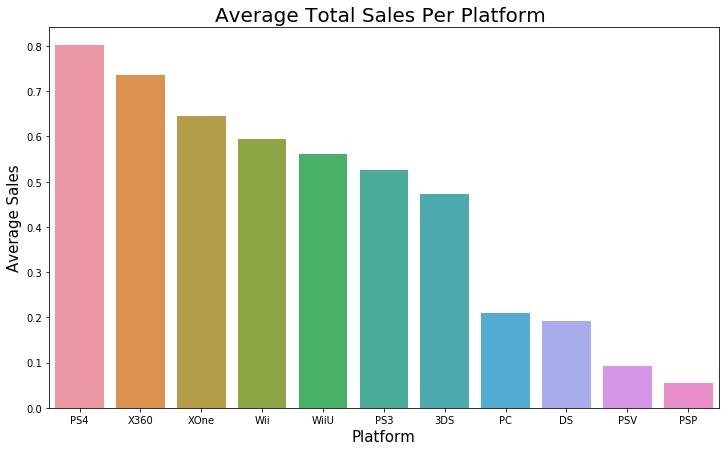

In [20]:
avg_sales = (games_new.groupby('platform').agg({
    'total_sales':'sum', 'game_name':'count'}).reset_index())

avg_sales['average_sales'] = avg_sales['total_sales'] / avg_sales['game_name']

avg_sales = avg_sales.sort_values(by='average_sales', ascending = False)
display(avg_sales)


y_values = avg_sales["average_sales"].values
plt.figure(figsize=(12, 7))
sns.barplot(x = 'platform', y = 'average_sales', data = avg_sales)
plt.title('Average Total Sales Per Platform ', size=20)
plt.xlabel('Platform', size=15)
plt.ylabel('Average Sales', size=15)
plt.show()

**Conclusion** 

We decided to calculate the average sales of games on various platforms by dividing the total sales of a platform by the number of games in the same platform. We saved the result of the average sales in column and used it to plot a bar chart to visualize our result.  
From the bar chart, PS4 has the highest average sales of games, and PSP has the lowest average sales of games.

[<a href="#Table-of-contents">Back to top</a>]

#### How user and professional reviews affect sales for one popular platform

In [21]:
# create a data slice for PS4 platform
popular_platform = games_new.query('platform == "PS4"')


# remove the 'unknown' values from the column
popular_platform = popular_platform.query('critic_score != "unknown" and user_score != ["unknown", "tbd"]')

# change the data type of the column
popular_platform.loc[:, 'critic_score'] = popular_platform['critic_score'].astype(float)

# display the data type of the column
display(popular_platform['critic_score'].dtype)


# change the data type of the column
popular_platform['user_score'] = pd.to_numeric(popular_platform['user_score'])

# display the data type of the column
display(popular_platform['critic_score'].dtype)

dtype('float64')

dtype('float64')

<Figure size 864x504 with 0 Axes>

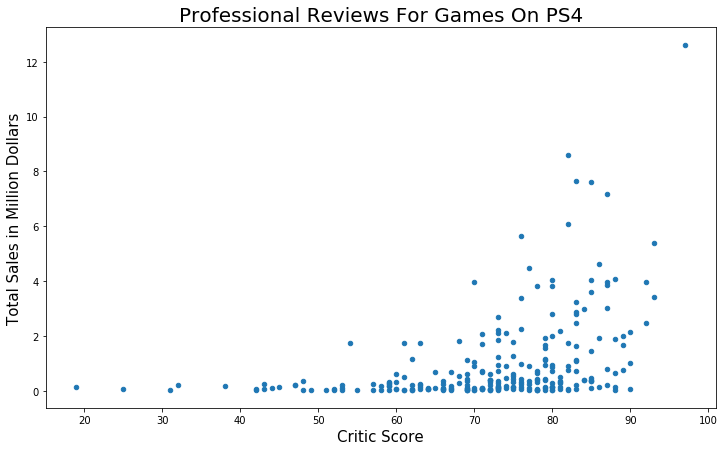

In [22]:
# create a boxplot for professional review
plt.figure(figsize=(12, 7))
popular_platform.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12, 7))
plt.title('Professional Reviews For Games On PS4', size=20)
plt.xlabel('Critic Score', size=15)
plt.ylabel('Total Sales in Million Dollars', size=15)
plt.show()

<Figure size 864x504 with 0 Axes>

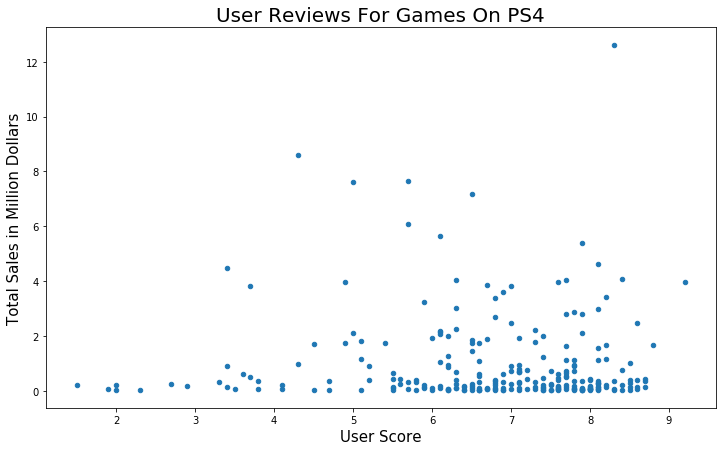

In [23]:
# create a boxplot for user review
plt.figure(figsize=(12, 7))
popular_platform.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12, 7))
plt.title('User Reviews For Games On PS4', size=20)
plt.xlabel('User Score', size=15)
plt.ylabel('Total Sales in Million Dollars', size=15)
plt.show()

In [24]:
# calculate correlation between professional review and sales
critic_corr = popular_platform['critic_score'].corr(popular_platform['total_sales'])
display('The correlation coefficient between professional review and sales is {:.2f}'.format(critic_corr))

# calculate correlation between user review and sales
user_corr = popular_platform['user_score'].corr(popular_platform['total_sales'])
display('The correlation coefficient between user review and sales is {:.2f}'.format(user_corr))

'The correlation coefficient between professional review and sales is 0.41'

'The correlation coefficient between user review and sales is -0.03'

**Conclusion**

We consider the popular platform to be PS4 because it has the highest average sales of all platforms from 2013 till 2016. We then decided to look at how professional and user review affect sales on this platform.

We began by making a slice of our dataset where the platform is PS4. We then create  boxplot for `critical_score` and `total_sales`, and also for `user_score` and `total_sales`.

For the first boxplot, `Professional Reviews For Games On PS4`, we can see that there is increase in total sales as the critic score increases. And also, a correlation of 0.41 between `critic_score` and `total_sales` implies a connection. We can therefore say that professional reviews do affect or have impact on sales on PS4 platform.

For the second boxplot, `User Reviews For Games On PS4`, we can see that there is almost an even distribution in the plot. And also, a correlation of -0.03 between `user_score` and `total_sales` implies no connection. We therefore say that user review do not affect sales on PS4 platform.


[<a href="#Table-of-contents">Back to top</a>]

#### Compare the sales of the same games on other platforms

In [25]:

other_platform = games_new.query('platform != "PS4"')

common_games = []

for x in popular_platform['game_name']:
    common_games.append(x)
    
other_platform = other_platform[other_platform['game_name'].isin(common_games)]



# remove the 'unknown' values from the column
other_platform = other_platform.query('critic_score != "unknown" and user_score != ["unknown", "tbd"]')

# change the data type of the column
other_platform.loc[:, 'critic_score'] = other_platform['critic_score'].astype(float)

# display the data type of the column
display(other_platform['critic_score'].dtype)


# change the data type of the column
other_platform['user_score'] = pd.to_numeric(other_platform['user_score'])

# display the data type of the column
display(other_platform['critic_score'].dtype)

display(other_platform.head())

dtype('float64')

dtype('float64')

,game_name,platform,year_of_release,genre,north_american_sales,europe_sales,japan_sales,other_countries_sales,critic_score,user_score,esrb_rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


<Figure size 864x504 with 0 Axes>

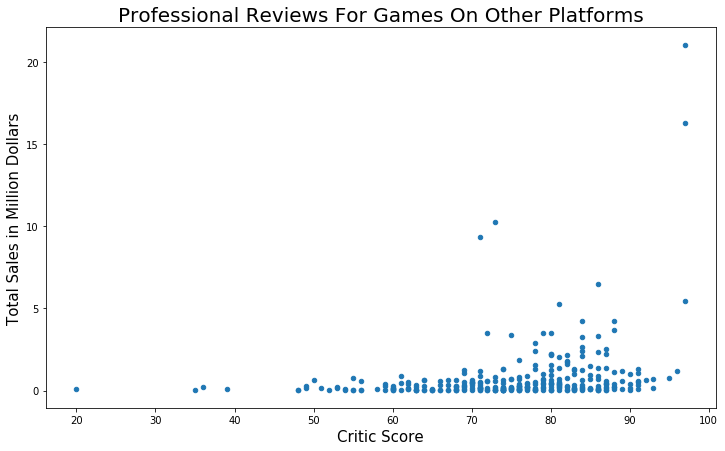

In [26]:
# create a boxplot for professional review
plt.figure(figsize=(12, 7))
other_platform.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12, 7))
plt.title('Professional Reviews For Games On Other Platforms', size=20)
plt.xlabel('Critic Score', size=15)
plt.ylabel('Total Sales in Million Dollars', size=15)
plt.show()

<Figure size 864x504 with 0 Axes>

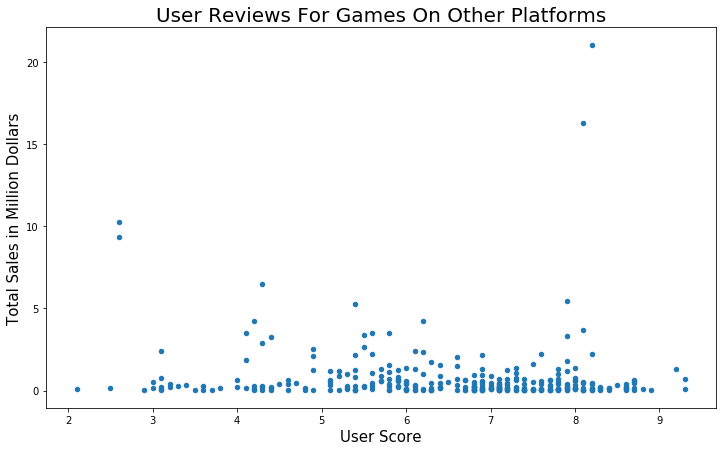

In [27]:
# create a boxplot for user review
plt.figure(figsize=(12, 7))
other_platform.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12, 7))
plt.title('User Reviews For Games On Other Platforms', size=20)
plt.xlabel('User Score', size=15)
plt.ylabel('Total Sales in Million Dollars', size=15)
plt.show()

In [28]:
# calculate correlation between professional review and sales
other_critic_corr = other_platform['critic_score'].corr(other_platform['total_sales'])
display('The correlation coefficient between professional review and sales is {:.2f}'.format(critic_corr))

# calculate correlation between user review and sales
other_user_corr = other_platform['user_score'].corr(other_platform['total_sales'])
display('The correlation coefficient between user review and sales is {:.2f}'.format(user_corr))

'The correlation coefficient between professional review and sales is 0.41'

'The correlation coefficient between user review and sales is -0.03'

**Conclusion**

We decided to compare the sales of the games on PS4 platform with the sales of the same games on other platforms.  
First, we make a slice from our dataset omitting the rows where the platform is PS4.

We then continue by creating boxplot for `critical_score` and `total_sales`, and also for `user_score` and `total_sales`.

We discovered that we have similar boxplots with the ones we have on PS4 platform, and also, the same correlation between `critic_score` and `total_sales` (0.41), and the same between `user_score` and `total_sales` (-0.03).

With this, we can say that professional reviews have impact on sales on all platforms including PS4, but user reviews do not have impact on sales on platforms.

[<a href="#Table-of-contents">Back to top</a>]

#### General distribution of games by genre

In [29]:
# group genres with the total sum of the total sales
genre_sales = (games_new.pivot_table(
    index='genre', values='total_sales', aggfunc='sum')
               .reset_index().sort_values(by='total_sales', ascending=False)
    )

display(genre_sales)

,genre,total_sales
0,Action,322.50
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,146.15
3,Misc,63.06
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


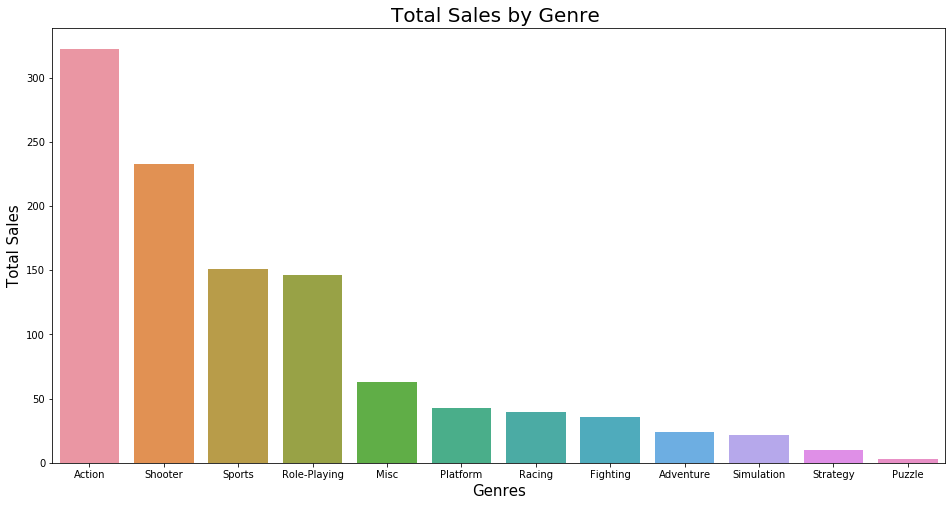

None

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'genre', y = 'total_sales', data = genre_sales)
plt.title('Total Sales by Genre ', size=20)
plt.xlabel('Genres', size=15)
plt.ylabel('Total Sales', size=15)
display(plt.show())

**Conclusion**

We can see that Action genre sells more than all other genres in the platform with the total sales of 963.44 million dollars from 2013 till 2016. This is followed by Shooter with a total sales of 611.46 million dollars. The least is Puzzle with a total sales of 56.30 million dollars.  
Between the highest profitable genre, Action, and the least profitable genre, Puzzle, is a total margin of 907.14 million dollars worth of sales.

[<a href="#Table-of-contents">Back to top</a>]

### Step 4. Create a user profile for each region

In [31]:
# group dataset by platform and sum sales
region_platform = games_new.groupby('platform').sum()[['north_american_sales','europe_sales','japan_sales']]

# change index to column
region_platform.reset_index(level='platform', inplace=True)
display(region_platform)

,platform,north_american_sales,europe_sales,japan_sales
0,3DS,38.20,30.96,67.81
1,DS,0.57,0.85,0.00
2,PC,11.19,25.84,0.00
3,PS3,63.50,67.81,23.35
4,PS4,108.74,141.09,15.96
5,PSP,0.00,0.17,3.53
6,PSV,5.15,6.15,18.66
7,Wii,6.56,5.93,0.05
8,WiiU,29.21,19.85,10.88
9,X360,81.66,42.52,0.51


So we decided to create a dataset for platforms sales of game in each region (North America, Europe, and Japan). 

#### Top 5 platforms in each region

**North America**

In [32]:
# sort dataset in descending order 
top_na_platform = region_platform.sort_values(by='north_american_sales', ascending=False)

# get the first five rows in the dataset
top_na_platform = top_na_platform['platform'].head(5)

display('The top 5 platforms in North America are:', top_na_platform)

'The top 5 platforms in North America are:'

4      PS4
10    XOne
9     X360
3      PS3
0      3DS
Name: platform, dtype: object

**Europe**

In [33]:
# sort dataset in descending order
top_eu_platform = region_platform.sort_values(by='europe_sales', ascending=False)
region_platform
# get the first five rows in the dataset
top_eu_platform = top_eu_platform['platform'].head(5)

display('The top 5 platforms in Europe are:', top_eu_platform)

'The top 5 platforms in Europe are:'

4      PS4
3      PS3
10    XOne
9     X360
0      3DS
Name: platform, dtype: object

**Japan**

In [34]:
# sort dataset in descending order
top_jp_platform = region_platform.sort_values(by='japan_sales', ascending=False)

# get the first five rows in the dataset
top_jp_platform = top_jp_platform['platform'].head(5)

display('The top 5 platforms in Japan are:', top_eu_platform)

'The top 5 platforms in Japan are:'

4      PS4
3      PS3
10    XOne
9     X360
0      3DS
Name: platform, dtype: object

**Conclusion**

We discovered that the same set of five platforms are sharing the spots for the top 5 platforms in different region. PS4 maintained the top spot (number 1 position) in each region, 3DS also maintained the fifth position in each, but PS3, XOne and X360 are swtching the second, third and forth positions.

[<a href="#Table-of-contents">Back to top</a>]

#### Top 5 genre in each region

**North America**

In [35]:
# group dataset by platform and sum sales
region_genre = games_new.groupby('genre').sum()[['north_american_sales','europe_sales','japan_sales']]

# change index to column
region_genre.reset_index(level='genre', inplace=True)
display(region_genre)

# sort dataset in descending order
top_na_genre = region_genre.sort_values(by='north_american_sales', ascending=False)

# get the first five rows in the dataset
top_na_genre = top_na_genre['genre'].head(5)

display('The top 5 genre in North America are:', top_na_genre)

,genre,north_american_sales,europe_sales,japan_sales
0,Action,126.13,118.61,40.49
1,Adventure,7.14,8.25,5.82
2,Fighting,15.55,8.55,7.65
3,Misc,27.49,20.04,9.44
4,Platform,18.14,15.58,4.79
5,Puzzle,0.83,1.00,1.18
6,Racing,12.96,20.19,2.30
7,Role-Playing,46.51,37.02,51.11
8,Shooter,109.74,87.86,6.61
9,Simulation,4.86,10.92,4.52


'The top 5 genre in North America are:'

0           Action
8          Shooter
10          Sports
7     Role-Playing
3             Misc
Name: genre, dtype: object

**Europe**

In [36]:
# sort dataset in descending order
top_eu_genre = region_genre.sort_values(by='europe_sales', ascending=False)

# get the first five rows in the dataset
top_eu_genre = top_eu_genre['genre'].head(5)

display('The top 5 genre in Europe are:', top_eu_genre)

'The top 5 genre in Europe are:'

0           Action
8          Shooter
10          Sports
7     Role-Playing
6           Racing
Name: genre, dtype: object

**Japan**

In [37]:
# sort dataset in descending order
top_jp_genre = region_genre.sort_values(by='japan_sales', ascending=False)

# get the first five rows in the dataset
top_jp_genre = top_jp_genre['genre'].head(5)

display('The top 5 genre in Europe are:', top_jp_genre)

'The top 5 genre in Europe are:'

7    Role-Playing
0          Action
3            Misc
2        Fighting
8         Shooter
Name: genre, dtype: object

**Conclusion**

We discovered that three genres are common in the top 5 rankings for genre of games in each region. These three genres are Action, Shooter, and Role-Playing. Action genre topped the list in North America and Europe, while Role-Playing topped in Japan.

[<a href="#Table-of-contents">Back to top</a>]

#### Do ESRB ratings affect sales in individual regions?

In [38]:
# group dataset by esrb rating and sum the sales by regions
rating_region_sales = (games_new.groupby('esrb_rating')
                       [['north_american_sales', 'europe_sales', 'japan_sales']]
                       .sum().reset_index())

# 
display(rating_region_sales)

,esrb_rating,north_american_sales,europe_sales,japan_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.29,145.80,14.11
3,T,49.90,42.00,20.66
4,undefined,89.42,78.91,85.29


**North America Sales**

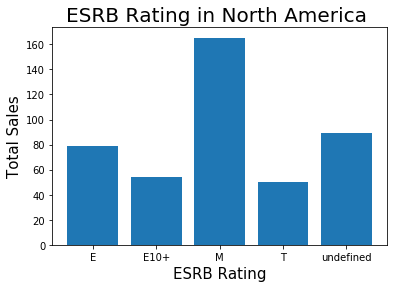

In [39]:
# plot a bar chart for rating and NA region
plt.bar(rating_region_sales['esrb_rating'], rating_region_sales['north_american_sales'])
plt.title('ESRB Rating in North America ', size=20)
plt.xlabel('ESRB Rating', size=15)
plt.ylabel('Total Sales', size=15)
plt.show()

**Conclusion**

We can see that games with M (mature) rating has the highest sales with over 160 million dollars sales. Next to it is games with undefined rating with over 80 million dollars sales, E (everyone) with about 80 million dollars sales, and last on the list are E10+ (everyone 10+) and T (teen), both with about 50 million dollars sales each. We can say that adullts is the population that play game the most in North America.

[<a href="#Table-of-contents">Back to top</a>]

**Europe Sales**

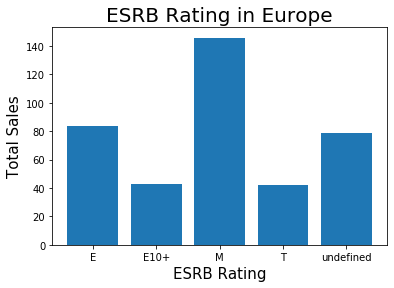

In [40]:
plt.bar(rating_region_sales['esrb_rating'], rating_region_sales['europe_sales'])
plt.title('ESRB Rating in Europe', size=20)
plt.xlabel('ESRB Rating', size=15)
plt.ylabel('Total Sales', size=15)
plt.show()

**Conclusion**

We can see that M (mature) rating has the highest sales with about 140 million dollars sales of games. Next to that is E (everyone) rating with over 80 million dollars of sales, followed by games with undefined rating, and last on the list are both T (teen) and E10+ (everyone 10+) with 40 million dollars sales each. We can say that the adults are the population that play games the most in Europe.

[<a href="#Table-of-contents">Back to top</a>]

**Japan Sales**

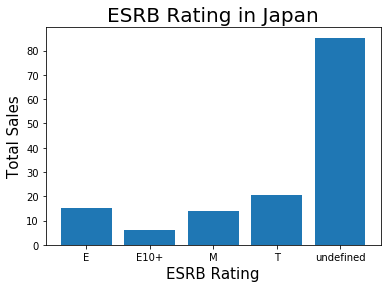

In [41]:
plt.bar(rating_region_sales['esrb_rating'], rating_region_sales['japan_sales'])
plt.title('ESRB Rating in Japan', size=20)
plt.xlabel('ESRB Rating', size=15)
plt.ylabel('Total Sales', size=15)
plt.show()

**Conclusion**

We can see that games with undefined rating has the highest sales with over 80 million dollars sales, E (everyone) comes next with over 20 million dollars sales,  and M (mature) both have sales lesser than 20 million dollars, and E10+ (everyone 10+) rated games having less than 10 million dollars sales. We could say that majority of the games played in Japan do not have ESRB rating.  


[<a href="#Table-of-content">Back to top</a>]

### Step 5. Test the following hypotheses

#### Average user ratings of the Xbox One and PC platforms are the same

In [42]:
# Slicing the good data for platform with values 'XOne'
xbox_one = games_new.query('platform == "XOne"')

# Removing the 'unknown' in 'user_score' of the slice
xbox_one = xbox_one.query('user_score != ["unknown", "tbd"]')

#changing the user score data type from object to float
xbox_one.loc[:, 'user_score'] = xbox_one['user_score'].astype(float)

# Taking the list of the user_score
xbox_one_user_list = xbox_one['user_score'].tolist()

# statistical population size
display('The population size of games on Xbox One platform is {}'.format(len(xbox_one_user_list)))


'The population size of games on Xbox One platform is 182'

In [43]:
# Slicing the good data for platform with values 'PC'
pc = games_new.query('platform == "PC"')

# Removing the 'unknown' in 'user_score' of the slice
pc = pc.query('user_score != ["unknown", "tbd"]')

#changing the user score data type from object to float
pc.loc[:, 'user_score'] = pc['user_score'].astype(float)

# Taking the list of the user_score
pc_user_list = pc['user_score'].tolist()
display('The population size of games on PC platform is {}'.format(len(pc_user_list)))


'The population size of games on PC platform is 158'

**Normality Test**

In [44]:

alpha = 0.05 # critical statistical significance level

# check for normality of populations
xbox_shapiro_test = st.shapiro(xbox_one_user_list)
display("The p-value for Shapiro Test on Xbox One is {}".format(xbox_shapiro_test[1]))


xbox_shapiro_pvalue = 1.524856543255737e-05

if (xbox_shapiro_pvalue < alpha):
    display('The data on Xbox One significantly deviate from a normal distribution')
else:
    display('The data on Xbox One is normally distributed')
    
    
# check for normality of populations
pc_shapiro_test = st.shapiro(pc_user_list)
display("The p-value for Shapiro Test on PC is {}".format(pc_shapiro_test[1]))

pc_shapiro_pvalue = 5.416122803580947e-06

if (pc_shapiro_pvalue < alpha):
    display('The data on PC significantly deviate from a normal distribution')
else:
    display('The data on PC is normally distributed')

'The p-value for Shapiro Test on Xbox One is 1.524856543255737e-05'

'The data on Xbox One significantly deviate from a normal distribution'

'The p-value for Shapiro Test on PC is 5.416122803580947e-06'

'The data on PC significantly deviate from a normal distribution'

Hello Irina,

I can not seem figure out what the problem is whenever I try to get the pvalue for Shapiro Test. If I run `pc_shapiro_test.pvalue`, I get the following error in return:

AttributeError: 'tuple' object has no attribute 'pvalue'

**Test for equality of variance**

In [45]:
# check the equality of variance of the populations
var_test = st.levene(xbox_one_user_list, pc_user_list, center='mean')
display(var_test.pvalue)


if (var_test.pvalue < alpha):
    display("The populations do not have equal variance")
else:
    display('The populations do have equal variance')

0.0008493003748626767

'The populations do not have equal variance'

**Hypothesis Test**

In [46]:
# Testing hypothesis
results = st.ttest_ind(xbox_one_user_list, pc_user_list, equal_var=False)

display('p-value: {}'.format(results.pvalue))

if (results.pvalue < alpha):
        display('We reject the null hypothesis')
else:
        display("We can't reject the null hypothesis")

'p-value: 0.16174359801784308'

"We can't reject the null hypothesis"

**Conclusion** 

To determine if the average users ratings of the Xbox One and PC platforms are the same, it is not sufficient for us to simply compare the average values of the user ratings of each platform. We need to carry out a correct test to determine if the average ratings are the same.

First, we will formulate our null hypothesis and alternative hypothesis. Since our goal is to determine if the average user ratings of the Xbox One and PC are the same, meaning that the means of user ratings of the two platforms are either equal or not equal, our null hypothesis will be stated with an equal sign, and alternative hypothesis will be stated with not equal sign.

H₀: Average user ratings of the Xbox One platform = Average user ratings of the PC platform  
H₁: Average user ratings of the Xbox One platform ≠ Average user ratings of the PC platform

We will be using the t-test of since we want to test our hypothesis that means of the two statistical populations are equal based on samples taken from them, and the alternative hypothesis is two-sided, that is bilateral. We will be applying the method `scipy.stats.ttest_ind(array1, array2, equal_var)`.

We will determine the size of the two populations (user ratings of Xbox One platform and user ratings from PC platform). The population size of user ratings from Xbox One platform is 182, and the poplation size of user ratings of PC genre is 158.

We decided to check if the two populations are normally distributed in order for us determine the test to be used in checking the equality of variance by carrying out `Shapiro-Wilk Test`. Our result showed that the two populations are not normally distributed, which made us carry out the `Levene's Test` to compare the variances of the two populations so that we can be sure whether to estimate the variance of each sample as a combined data set or separately.

We set our significance level `(alpha)` to 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that we require stronger evidence before we reject or do not reject the null hypothesis.

After carrying out the test, we have a p-value of 0.16174359801784308. Since the p-value is greater than our significance level, we can not reject our null hypothesis. Our analysis suggests that the user ratings of Xbox One platform are the same with the user ratings of PC platform, that is, the user ratings for the two platforms do not differ. This means that users enjoy playing games on one platform same as they enjoy playing on the other platform.

[<a href="#Table-of-content">Back to top</a>] 

#### Average user ratings for the Action and Sports genres are different

In [47]:
# Slicing the good data for genre with values 'Action'
action = games_new.query('genre == "Action"')

# Removing the 'unknown' in 'user_score' of the slice
action = action.query('user_score != ["unknown", "tbd"]')

#changing the user score data type from object to float
action.loc[:, 'user_score'] = action['user_score'].astype(float)

# Taking the list of the user_score
action_list = action['user_score'].tolist()
display('The population size of Action genre is {}'.format(len(action_list)))


'The population size of Action genre is 392'

In [48]:
# Slicing the good data for genre with values 'Sports'
sports = games_new.query('genre == "Sports"')

# Removing the 'unknown' in 'user_score' of the slice
sports = sports.query('user_score != ["unknown", "tbd"]')

# changing the user score data type from object to float
sports.loc[:, 'user_score'] = sports['user_score'].astype(float)

# Taking the list of the user_score
sports_list = sports['user_score'].tolist()
display('The population size of Sport genre is {}'.format(len(sports_list)))


'The population size of Sport genre is 160'

**Normality Test**

In [49]:
alpha = 0.05 # critical statistical significance level

# check for normality of populations
action_shapiro_test = st.shapiro(action_list)
display("The p-value for Shapiro Test on Action genre is {}".format(action_shapiro_test[1]))


action_shapiro_pvalue = 1.3770211235381372e-14

if (action_shapiro_pvalue < alpha):
    display('The data on Action genre significantly deviate from a normal distribution')
else:
    display('The data on Action genre is normally distributed')
    
    
# check for normality of populations
sports_shapiro_test = st.shapiro(sports_list)
display("The p-value for Shapiro Test on Sport genre is {}".format(sports_shapiro_test[1]))

sport_shapiro_pvalue = 0.03234051540493965

if (sport_shapiro_pvalue < alpha):
    display('The data on Sport genre significantly deviate from a normal distribution')
else:
    display('The data on Sport genre is normally distributed')

'The p-value for Shapiro Test on Action genre is 1.3770211235381372e-14'

'The data on Action genre significantly deviate from a normal distribution'

'The p-value for Shapiro Test on Sport genre is 0.03234051540493965'

'The data on Sport genre significantly deviate from a normal distribution'

**Test for equality of variance**

In [50]:
# check the equality of variance of the populations
var_test2 = st.levene(action_list, sports_list, center='mean')
display(var_test2.pvalue)


if (var_test2.pvalue < alpha):
    display("The populations do not have equal variance")
else:
    display('The populations do have equal variance')

1.165143477411694e-07

'The populations do not have equal variance'

**Hypothesis Test**

In [51]:
# Testing hypothesis
alpha = 0.05 # critical statistical significance level

results = st.ttest_ind(sports_list, action_list, equal_var=False)

print('p-value: {}'.format(results.pvalue))

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 1.3883444596405356e-20
We reject the null hypothesis


**Conclusion**

To determine if the average users ratings for the Action and Sports genres differs, it is not sufficient for us to simply compare the average values of the user ratings for each genre. We need to carry out a correct test to determine if the average ratings differ.

First, we will formulate our null hypothesis and alternative hypothesis. Since our goal is to determine if the average user ratings for the Action and Sports differ, meaning that the means of user ratings of the two genres are either equal or not equal, our null hypothesis will be stated with an equal sign, and alternative hypothesis will be stated with not equal sign.

H₀: Average user ratings for the Action genre = Average user ratings for the Sports genre  
H₁: Average user ratings for the Action genre ≠ Average user ratings for the Sports genre

We will be using the t-test of since we want to test our hypothesis that means of the two statistical populations are equal based on samples taken from them, and the alternative hypothesis is two-sided, that is bilateral. We will be applying the method `scipy.stats.ttest_ind(array1, array2, equal_var)`.

We will determine the size of the two populations (user ratings from Action genre and user ratings from Sports genre). The population size of user ratings from Action genre is 392, and the poplation size of user ratings from Sports genre is 160.

We decided to check if the two populations are normally distributed in order for us determine the test to be used in checking the equality of variance by carrying out `Shapiro-Wilk Test`. Our result showed that the two populations are not normally distributed, which made us carry out the `Levene's Test` to compare the variances of the two populations so that we can be sure whether to estimate the variance of each sample as a combined data set or separately.

We set our significance level (alpha) to 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that we require stronger evidence before we reject or do not reject the null hypothesis.

After carrying out the test, we have a p-value of 1.3883444596405356e-20. Since the p-value is lesser than our significance level, we reject our null hypothesis. Our analysis suggests that the user ratings from Action and Sports genres differs, meaning users enjoy playing one genre than the other.


### Step 6. Write a general conclusion

During our analysis, we discovered that there are some missing values in our dataset which are left as unknown and to be determined. We are provided with data for that ratings and sales of games in different regions. We decided to to add the sales of these regions to get global sales which will play a big part in our analysis.

According to our dataset, we discovered that more games were released during the period of 2000 to 2009, and very few were released during the 80s. 

We discovered that four platforms (TG16, 3DO, GG, and PCFX) made less than a million dollar sales globally and only six platforms made over 600 millions dollar sales globally (PS2, X360, PS3, Wii, D5, PS), and the rest made less than 400 millions dollar sales. The platform with the highest sales globally was PS2, making over 1200 millions dollar sales.

We discovered that generally, it took the old platforms like PS and PS2 10 years to fade away and it took a year for new platforms to appear.

We decided to pick 2013 as the year to take data from so that we will be able to build a prognosis for the year 2017, considering 3 years sufficient to study and make prediction for sales. We started working with data from this year by ignoring the previous years.

The top five platforms that are leading in sales from 2013 to 2015 are PS4, PS3, XOne, 3DS and X360, with PS4 having the highest sales globally of over 300 million dollars. 

`Grand Theft Auto V` is the game with highest sales globally with 21.05 million dollars sales. We discovered that the differences in sales varies from platform to platform, meaning the differences is significant.

We considered PS4 to be the most popular platform because it has the highest average sales of all platforms from 2013 till 2016. We discovered that professional reviews did have impact on the sales on PS4 and other platforms, but user reviews did not have impact on the sales on PS4 and other platforms.

We discovered that Action genre sells more than all other genres in the PS4 platform with the total sales of 963.44 million dollars from 2013 till 2016. This is followed by Shooter with a total sales of 611.46 million dollars. The least is Puzzle with a total sales of 56.30 million dollars.

Putting Northern America, Europe and Japan into consideration, we discovered that the same set of five platforms are sharing the spots for the top 5 platforms in different region with PS4 being on the top spot (number 1 position) in each region. 3DS also maintained the fifth position in each, but PS3, XOne and X360 are swtching the second, third and forth positions.

We also discovered that three genres are common in the top 5 rankings for genre of games in each region. These three genres are Action, Shooter, and Role-Playing. Action genre topped the list in North America and Europe, while Role-Playing topped in Japan.

Games with M (mature) rating has the highest sales in Nort America and Europe, with over 160 million dollars sales and 140 million dollars sales respectively. Games without the esrb rating have the highest sales of games in Japan with over 80 million dollars sales.

After carrying out hypothesis test to determine if the average users ratings of the Xbox One and PC platforms are the same, we we could not reject our null hypothesis meaning that the user ratings of Xbox One platform are the same with the user ratings of PC platform, that is, the user ratings for the two platforms do not differ. This means that users enjoy playing games on one platform same as they enjoy playing on the other platform.

We also carried out test to determine if the average users ratings for the Action and Sports genres differs and we rejected our null hypothesis which suggested that the user ratings from Action and Sports genres differs, meaning users enjoy playing one genre than the other.

The global aim of this project is the PREDICTION of the sales, popularity, profitability of the platforms, so we need to analyze not past but now and future as it is mentioned in the instruction:

From our analysis, we can conclude that there will be increase in sales of new platforms like PS4 and XOne as they are yet to be at their peak globally.  
For North America and Europe market, Action and shooting games with M rating irrespective of the platform will see increase in sales in 2017. And also, games with high critic score of 70 and above will be profitable.
For the Japan market, Role-playing games without esrb rating will be more profitable. 

[<a href="#Table-of-contents">Back to top</a>]